### Настройки

Начинаем с импорта библиотек

In [15]:
# Импортируем библиотеки: pandas для работы с таблицами, psycopg2 для подключения к PostgreSQL
import pandas as pd
import psycopg2  # библиотека для работы с PostgreSQL

# Используем словарь df для хранения нескольких DataFrame по ключам (удобно для отображения).
df = {}

Начинаем с импорта библиотек

In [2]:
# Параметры подключения к БД (пример из курса).
DBNAME = 'skillfactory'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'  # Замените на ваш пароль или используйте secrets
HOST = '84.201.134.129'
PORT = 5432

In [3]:
# Создаём соединение с PostgreSQL с параметрами выше.
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT,
)

In [4]:
# Пример формирования SQL-запроса в строковой переменной.
# Здесь показывается использование f-строки для подставления параметров (n).

n = 10
query = f'''SELECT * 
            FROM sql.pokemon 
            LIMIT {n}
         '''
# В реальных задачах лучше использовать параметры запросов, чтобы избегать SQL-инъекций.

In [5]:
# Выполняем SQL-запрос и загружаем результат в DataFrame pandas.
# read_sql_query возвращает DataFrame, удобный для дальнейшего анализа и отображения.

df_ = pd.read_sql_query(query, connection)
df_

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\3462785109.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ = pd.read_sql_query(query, connection)


,id,name,type1,type2,hp,attack,defense,speed
0,1,Bulbasaur,Grass,Poison,45,49,49,45
1,2,Ivysaur,Grass,Poison,60,62,63,60
2,3,Venusaur,Grass,Poison,80,82,83,80
3,4,VenusaurMega Venusaur,Grass,Poison,80,100,123,80
4,7,Charizard,Fire,Flying,78,84,78,100
5,8,CharizardMega Charizard X,Fire,Dragon,78,130,111,100
6,9,CharizardMega Charizard Y,Fire,Flying,78,104,78,100
7,16,Butterfree,Bug,Flying,60,45,50,70
8,17,Weedle,Bug,Poison,40,35,30,50
9,18,Kakuna,Bug,Poison,45,25,50,35


In [6]:
# Пример подключения к другой базе 'project_sql' (переназначение параметров).
# Для смены БД достаточно изменить переменные выше и создать новое соединение.
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'  # замените при необходимости
HOST = '84.201.134.129'
PORT = 5432

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT,
)

In [7]:
# Задание 3.1 — загрузка таблицы vacancies полностью.
# Внимание: выборка всех строк может быть большой — в учебных целях допустимо.

n = 10  # не используется в этом запросе, оставлено из шаблона
query3_1 = f'''SELECT *
           FROM public.vacancies
        '''

df['vacancies'] = pd.read_sql_query(query3_1, connection)  # загружаем таблицу в df['vacancies']
display(df['vacancies'])  # показываем таблицу
display(df['vacancies'].shape[0])  # показываем количество строк (вакансий)

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\1307468050.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies'] = pd.read_sql_query(query3_1, connection)  # загружаем таблицу в df['vacancies']


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,1955,1740
...,...,...,...,...,...,...,...,...,...,...
49192,55589514,Специалист по информационным технологиям,Электронный документооборот\t1С: Предприятие 8...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,66,5109332
49193,55029668,Руководитель процессного офиса,Оптимизация бизнес-процессов\tСтратегическое м...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,26,51333
49194,66172263,Начальник сервисной службы,Организаторские навыки\tУправление персоналом\...,Полный день,От 1 года до 3 лет,Полная занятость,60000.0,NaN,1930,4094700
49195,66180086,Senior IOS разработчик,Swift\tRealm\tiOS\tАнглийский язык\tMVP\tMVVM\...,Полный день,От 1 года до 3 лет,Полная занятость,146456.0,244094.0,160,4469939


49197

In [8]:
# Альтернативный способ — напрямую посчитать количество записей через COUNT(*) в SQL.

vacancies = pd.read_sql_query("SELECT COUNT(*) FROM public.vacancies", connection)
vacancies_count2 = vacancies.iloc[0, 0]  # извлекаем значение из результата
print('Vacancies:', vacancies_count2)  # выводим количество вакансий

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\517133547.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies = pd.read_sql_query("SELECT COUNT(*) FROM public.vacancies", connection)


Vacancies: 49197


In [9]:
# Задание 3.2 — загрузка таблицы employers и подсчёт числа работодателей.

query3_2 = f'''SELECT *
           FROM public.employers
        '''
df['employers'] = pd.read_sql_query(query3_2, connection)  # сохраняем в df['employers']
display(df['employers'])
print('Number of employers: ', df['employers'].shape[0])  # выводим количество работодателей

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\2343314660.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['employers'] = pd.read_sql_query(query3_2, connection)  # сохраняем в df['employers']


,id,name,area
0,2393,"Программный Продукт, ИТ-компания",1
1,72977,БАРС Груп,88
2,3155,"Бест, Торгово-производственная компания, Екате...",3
3,675,КОРУС Консалтинг,2
4,1840010,филиал ФКУ Налог-Сервис ФНС России в Республик...,88
...,...,...,...
23496,1441774,МарКо,88
23497,4718575,MKomov Studio,73
23498,3702770,АКИБ Ипотека-банк,2759
23499,5636092,ГИМ-КЛИНИКА,99


Number of employers:  23501


In [10]:
# Задание 3.3 — загрузка таблицы areas и подсчёт числа регионов.

query3_3 = f'''select *
           from public.areas
        '''
df['areas'] = pd.read_sql_query(query3_3, connection)  # сохраняем в df['areas']
display(df['areas'])
print('Number of areas: ', df['areas'].shape[0])  # выводим количество регионов

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\3950975185.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['areas'] = pd.read_sql_query(query3_3, connection)  # сохраняем в df['areas']


,id,name
0,2758,Тбилиси
1,8,Майкоп
2,1180,Нерюнгри
3,1240,Новокузнецк
4,2,Санкт-Петербург
...,...,...
1357,5043,Звёздный Городок
1358,3934,Воротынск\n
1359,4825,Чемал
1360,3708,Усть-Нера


Number of areas:  1362


In [11]:
# Задание 3.4 — загрузка таблицы industries и подсчёт числа сфер деятельности.

query3_4 = f'''SELECT *
           FROM public.industries
        '''
df['industries'] = pd.read_sql_query(query3_4, connection)
display(df['industries'])
print('Number of industries: ', df['industries'].shape[0])  # выводим количество сфер

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\1461491943.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['industries'] = pd.read_sql_query(query3_4, connection)


,id,name
0,7.540,Разработка программного обеспечения
1,7.539,"Системная интеграция, автоматизации технологи..."
2,27.550,Безалкогольные напитки (производство)
3,27.551,"Безалкогольные напитки (продвижение, оптовая т..."
4,13.664,Управление и эксплуатация недвижимости
...,...,...
289,37.626,"Ассоциация в сфере культуры, искусства"
290,42.603,Табак (производство)
291,29.532,"Рыболовство, рыбоводство"
292,37.627,Благотворительная организация


Number of industries:  294


In [12]:
# Задание 4.1 — топ-5 регионов по числу вакансий.

query4_1 = f'''select
              a.name area,
              count(v.id) cnt
           from public.areas a
           join public.vacancies v on a.id = v.area_id
           group by a.id
           order by cnt desc
           limit 5
        '''
df['vacancies_num_in_area'] = pd.read_sql_query(query4_1, connection)
display(df['vacancies_num_in_area'])  # показываем результат

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\2431280656.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_num_in_area'] = pd.read_sql_query(query4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


In [13]:
# Задание 4.2 — считаем вакансии, где указана хотя бы одна граница зарплаты.

query4_2 = f'''
    SELECT COUNT(*) AS cnt
    FROM public.vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''
df['vacancies_with_salary'] = pd.read_sql_query(query4_2, connection)
display(df['vacancies_with_salary'])  # показываем количество вакансий с указанной зарплатой

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\3667544442.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_with_salary'] = pd.read_sql_query(query4_2, connection)


,cnt
0,24073


In [14]:
# Задание 4.3 — вычисляем среднее по нижней и верхней границе зарплаты (округлено).

query4_3 = f'''
    SELECT
        ROUND(AVG(salary_from)) AS avg_salary_from,
        ROUND(AVG(salary_to)) AS avg_salary_to
    FROM public.vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''
df['avg_salary_range'] = pd.read_sql_query(query4_3, connection)
display(df['avg_salary_range'])  # показываем средние значения зарплат

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\1468439817.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['avg_salary_range'] = pd.read_sql_query(query4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


In [15]:
# Задание 4.4 — находим вторую по популярности пару (schedule, employment).

query4_4 = f'''
    SELECT
        schedule,
        employment,
        COUNT(*) AS cnt
    FROM public.vacancies
    GROUP BY schedule, employment
    ORDER BY cnt DESC
    OFFSET 1
    LIMIT 1
'''
df['vacancies_by_schedule_employment'] = pd.read_sql_query(query4_4, connection)
display(df['vacancies_by_schedule_employment'])  # выводим пару на 2-м месте

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\2023268951.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_by_schedule_employment'] = pd.read_sql_query(query4_4, connection)


,schedule,employment,cnt
0,Удаленная работа,Полная занятость,7802


In [16]:
# Задание 4.5 — сортируем варианты опыта по возрастанию количества вакансий, где указан этот опыт.

query4_5 = f'''select
              v.experience,
              count(v.id) experience_cnt
           from public.vacancies v
           group by v.experience
           order by experience_cnt asc
        '''
df['experience_cnt'] = pd.read_sql_query(query4_5, connection)
display(df['experience_cnt'])  # показываем результат

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\1590331682.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['experience_cnt'] = pd.read_sql_query(query4_5, connection)


,experience,experience_cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


In [17]:
# Задание 5.1 — находим работодателей на 1-м и 5-м местах по числу вакансий.

query5_1 = f'''WITH emp_count AS (SELECT e.name, COUNT(v.id) cnt
           FROM public.employers e
           JOIN public.vacancies v ON e.id = v.employer_id
           GROUP BY e.id
           ORDER BY cnt DESC
        )
        SELECT *
        FROM emp_count
        WHERE cnt = (SELECT MAX(cnt) FROM emp_count)
        OR cnt = (SELECT cnt FROM emp_count ORDER BY cnt DESC OFFSET 4 LIMIT 1)
        '''
df['top_1_and_5_employers'] = pd.read_sql_query(query5_1, connection)
display(df['top_1_and_5_employers'])  # показываем топ-1 и топ-5 работодателей

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\1211410324.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['top_1_and_5_employers'] = pd.read_sql_query(query5_1, connection)


,name,cnt
0,Яндекс,1933
1,Газпром нефть,331


In [18]:
# Задание 5.2 — ищем регион без вакансий с максимальным числом работодателей.

query5_2 = f'''
    SELECT a.name AS area_name,
           COUNT(e.id) AS employer_count,
           COUNT(v.id) AS vacancy_count
    FROM public.areas a
    LEFT JOIN public.employers e ON a.id = e.area
    LEFT JOIN public.vacancies v ON a.id = v.area_id
    GROUP BY a.name
    HAVING COUNT(v.id) = 0
    ORDER BY employer_count DESC
    LIMIT 1
'''
df['region_with_most_employers_no_vacancies'] = pd.read_sql_query(query5_2, connection)
display(df['region_with_most_employers_no_vacancies'])  # показываем найденный регион

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\379473102.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['region_with_most_employers_no_vacancies'] = pd.read_sql_query(query5_2, connection)


,area_name,employer_count,vacancy_count
0,Россия,410,0


In [19]:
# Задание 5.3 — считаем для каждого работодателя число уникальных регионов публикации вакансий.

query5_3 = f'''
    SELECT e.id AS employer_id,
           e.name AS employer_name,
           COUNT(DISTINCT v.area_id) AS region_count
    FROM public.employers e
    LEFT JOIN public.vacancies v ON e.id = v.employer_id
    GROUP BY e.id, e.name
    ORDER BY region_count DESC
'''
df['employer_region_counts'] = pd.read_sql_query(query5_3, connection)
display(df['employer_region_counts'])  # показываем работодателей и число регионов

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\2853631251.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['employer_region_counts'] = pd.read_sql_query(query5_3, connection)


,employer_id,employer_name,region_count
0,1740,Яндекс,181
1,2748,Ростелеком,152
2,5724811,Спецремонт,116
3,5130287,Поляков Денис Иванович,88
4,3682876,ООО ЕФИН,71
...,...,...,...
23496,5287515,Но Смокинг,0
23497,2839354,МАСТЕРСКАЯ CREED,0
23498,5774578,Dzing Finance,0
23499,5775069,КОРС,0


In [20]:
# Задание 5.4 — считаем работодателей без указания сферы деятельности.

query5_4 = f'''
    SELECT COUNT(*) AS employer_count
    FROM public.employers e
    left join public.employers_industries ei on e.id = ei.employer_id
    WHERE ei.industry_id is null
'''
df['employers_no_industry'] = pd.read_sql_query(query5_4, connection)
display(df['employers_no_industry'])  # показываем число таких работодателей

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\1061763170.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['employers_no_industry'] = pd.read_sql_query(query5_4, connection)


,employer_count
0,8419


In [21]:
# Задание 5.5 — находим третью компанию в алфавите среди компаний с ровно 4 сферами деятельности.

query5_5 = f'''
    SELECT e.name AS employer_name
    FROM public.employers e
    JOIN public.employers_industries ei ON e.id = ei.employer_id
    GROUP BY e.id, e.name
    HAVING COUNT(ei.industry_id) = 4
    ORDER BY e.name
    LIMIT 1 OFFSET 2
'''
df['third_employer_with_four_industries'] = pd.read_sql_query(query5_5, connection)
display(df['third_employer_with_four_industries'])  # выводим название компании

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\1163965445.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['third_employer_with_four_industries'] = pd.read_sql_query(query5_5, connection)


,employer_name
0,2ГИС


In [22]:
# Задание 5.6 — считаем работодателей, у которых в списке сфер есть 'Разработка программного обеспечения'.

query5_6 = f'''
    SELECT COUNT(DISTINCT e.id) AS employer_count
    FROM public.employers e
    JOIN public.employers_industries ei ON e.id = ei.employer_id
    WHERE ei.industry_id = (SELECT id FROM public.industries WHERE name = 'Разработка программного обеспечения')
'''
df['employers_with_software_development'] = pd.read_sql_query(query5_6, connection)
display(df['employers_with_software_development'])  # показываем результат

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\1809080605.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['employers_with_software_development'] = pd.read_sql_query(query5_6, connection)


,employer_count
0,3553


In [23]:
# Задание 5.7 — для 'Яндекс' собираем вакансии по крупным городам (миллионникам) и добавляем строку Total.

query5_7 = f'''
    SELECT a.name AS area_name,
           COUNT(v.id) AS vacancy_count
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    WHERE v.employer_id = (SELECT id FROM public.employers WHERE name = 'Яндекс')
      AND a.name IN ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Самара', 'Омск', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Краснодар','Воронеж', 'Пермь', 'Волгоград')
    GROUP BY a.id, a.name
    UNION ALL
    SELECT 'Total' AS area_name,
           COUNT(v.id) AS vacancy_count
    FROM public.vacancies v
    WHERE v.employer_id = (SELECT id FROM public.employers WHERE name = 'Яндекс')
'''
df['yandex_millionaire_areas'] = pd.read_sql_query(query5_7, connection)
display(df['yandex_millionaire_areas'])  # выводим таблицу по Яндексу

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\2596918924.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['yandex_millionaire_areas'] = pd.read_sql_query(query5_7, connection)


,area_name,vacancy_count
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Новосибирск,35
4,Волгоград,24
5,Воронеж,32
6,Краснодар,30
7,Красноярск,23
8,Нижний Новгород,36
9,Омск,21


In [24]:
# Задание 6.1 — считаем вакансии, в названии которых встречаются 'data' или 'данн' (регистронезависимо).

query6_1 = f'''
    SELECT COUNT(*) AS vacancy_count
    FROM public.vacancies
    WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
'''
df['vacancies_related_to_data'] = pd.read_sql_query(query6_1, connection)
display(df['vacancies_related_to_data'])  # показываем количество вакансий, связанных с данными

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\554087196.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_related_to_data'] = pd.read_sql_query(query6_1, connection)


,vacancy_count
0,1771


In [25]:
# Задание 6.2 — ищем вакансии для начинающих DS по набору ключевых слов в названии и по признакам 'junior'.
# Запрос состоит из двух частей: детализированный список по названиям и итоговый 'total'.

query6_2 = f'''
SELECT
    v.name AS data_science_vacancy,
    COUNT(v.id) AS number_of_vacancies
FROM public.vacancies v
WHERE (
    LOWER(v.name) LIKE '%data scientist%' OR
    LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR
    (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
    LOWER(v.name) LIKE '%machine learning%' OR
    (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
)
AND (
    LOWER(v.name) LIKE '%junior%' OR
    LOWER(v.experience) LIKE '%нет опыта%' OR
    LOWER(v.employment) LIKE '%стажировка%'
)
GROUP BY v.name

UNION ALL

SELECT
    'total' AS data_science_vacancy,
    COUNT(v.id) AS number_of_vacancies
FROM public.vacancies v
WHERE (
    LOWER(v.name) LIKE '%data scientist%' OR
    LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR
    (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
    LOWER(v.name) LIKE '%machine learning%' OR
    (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
)
AND (
    LOWER(v.name) LIKE '%junior%' OR
    LOWER(v.experience) LIKE '%нет опыта%' OR
    LOWER(v.employment) LIKE '%стажировка%'
)

'''
df['junior_vacancies_related_to_data_science'] = pd.read_sql_query(query6_2, connection)
display(df['junior_vacancies_related_to_data_science'])  # показываем найденные вакансии

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\788717767.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['junior_vacancies_related_to_data_science'] = pd.read_sql_query(query6_2, connection)


,data_science_vacancy,number_of_vacancies
0,Data Scientist,1
1,Data Scientist (Computer Vision) - Junior,1
2,Data Scientist (Computer Vision) / Junior,1
3,Data Scientist (Junior),1
4,Data Scientist (Junior+),1
5,"Data Scientist, Junior",2
6,Data Scientist (junior+/middle),1
7,Data scientist (Junior/Middle) в консалтинг,1
8,Data Scientist/Machine Learning Engineer (Deve...,3
9,Data Scientist/ML engineer (Python/C++),1


In [26]:
# Задание 6.2 — вариант с CTE (WITH) для повышения читаемости: сначала фильтруем вакансии, затем считаем.

query6_2_2 = f'''WITH filtered_vacancies AS (
    SELECT v.name, v.id
    FROM public.vacancies v
    WHERE (
        lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (lower(v.name) LIKE '%ml%' AND lower(v.name) NOT LIKE '%html%') OR
        lower(v.name) LIKE '%machine learning%' OR
        lower(v.name) LIKE '%машинн%обучен%'
    )
    AND (
        lower(v.name) LIKE '%junior%' OR
        lower(v.experience) LIKE '%нет опыта%' OR
        lower(v.employment) LIKE '%стажировка%'
    )
)

SELECT
    name AS data_science_vacancy,
    COUNT(id) AS junior_number_of_vacancies
FROM filtered_vacancies
GROUP BY name

UNION ALL

SELECT
    'total' AS data_science_vacancy,
    COUNT(id) AS junior_number_of_vacancies
FROM filtered_vacancies;
'''
df['junior_vacancies_related_to_data_science_2'] = pd.read_sql_query(query6_2_2, connection)
display(df['junior_vacancies_related_to_data_science_2'])  # показываем результат альтернативного запроса

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\534904487.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['junior_vacancies_related_to_data_science_2'] = pd.read_sql_query(query6_2_2, connection)


,data_science_vacancy,junior_number_of_vacancies
0,Junior Research Engineer / Data Scientist,1
1,Data scientist (Junior/Middle) в консалтинг,1
2,Intern/Junior Data Scientist,1
3,Senior Data Scientist (AI),1
4,Риск - Аналитик (Junior Data scientist),1
5,Junior Data Scientist,3
6,"Data Scientist, Junior",2
7,Junior Data Scientist (Promo Forecast),1
8,Junior+ CV/ML developer,1
9,Python developer / Junior ML engineer,1


In [27]:
# Задание 6.3 — среди вакансий для DS смотрим, где в ключевых навыках указаны SQL или Postgres.

query6_3 = f'''WITH filtered_vacancies AS (
    SELECT v.name, v.id, v.key_skills
    FROM public.vacancies v
    WHERE (
        LOWER(v.name) LIKE '%data scientist%' OR
        LOWER(v.name) LIKE '%data science%' OR
        LOWER(v.name) LIKE '%исследователь данных%' OR
        (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
        LOWER(v.name) LIKE '%machine learning%' OR
        (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
    )
)

SELECT
    name AS data_science_vacancy,
    COUNT(id) AS number_of_vacancies_with_sql_or_postgres
FROM filtered_vacancies
WHERE LOWER(key_skills) LIKE '%sql%' OR LOWER(key_skills) LIKE '%postgres%'
GROUP BY name

UNION ALL

SELECT
    'total' AS data_science_vacancy,
    COUNT(id) AS number_of_vacancies_with_sql_or_postgres
FROM filtered_vacancies
WHERE LOWER(key_skills) LIKE '%sql%' OR LOWER(key_skills) LIKE '%postgres%';
'''
df['vacancies_with_sql_or_postgres'] = pd.read_sql_query(query6_3, connection)
display(df['vacancies_with_sql_or_postgres'])  # показываем вакансии, где указаны SQL/Postgres

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\92792377.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_with_sql_or_postgres'] = pd.read_sql_query(query6_3, connection)


,data_science_vacancy,number_of_vacancies_with_sql_or_postgres
0,Data Science эксперт,1
1,Аналитик (data science),1
2,Data scientist (директор) в управление процесс...,1
3,Data Scientist (Middle/Senior),1
4,Разработчик Golang/Python в команду аналитики ...,1
...,...,...
151,C++ разработчик (QML),1
152,Data scientist (Прогнозирование спроса),1
153,TeamLead Analyst BI (AI Driving Data),1
154,TeamLead группы системного администрирования,1


In [28]:
# Задание 6.4 — аналогично проверяем популярность Python в ключевых навыках для DS.

query6_4 = f'''WITH filtered_vacancies AS (
    SELECT v.name, v.id, v.key_skills
    FROM public.vacancies v
    WHERE (
        lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (lower(v.name) LIKE '%ml%' AND lower(v.name) NOT LIKE '%html%') OR
        lower(v.name) LIKE '%machine learning%' OR
        (lower(v.name) LIKE '%машинн%' AND lower(v.name) LIKE '%обучен%')
    )
)

SELECT
    name AS data_science_vacancy,
    COUNT(id) AS number_of_vacancies_with_python
FROM filtered_vacancies
WHERE lower(key_skills) LIKE '%python%'
GROUP BY name

UNION ALL

SELECT
    'total' AS data_science_vacancy,
    COUNT(id) AS number_of_vacancies_with_python
FROM filtered_vacancies
WHERE lower(key_skills) LIKE '%python%';
'''
df['vacancies_with_python'] = pd.read_sql_query(query6_4, connection)
display(df['vacancies_with_python'])  # показываем вакансии с Python в ключевых навыках

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\3730191169.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_with_python'] = pd.read_sql_query(query6_4, connection)


,data_science_vacancy,number_of_vacancies_with_python
0,AI/ML Senior Engineer,2
1,Analyst/Data Scientist,1
2,B2B Data Scientist (Эксперт по моделированию и...,1
3,Chief Data Science (Цифровой кредитный монитор...,1
4,Commercial Data Scientist / Эксперт по наукоем...,1
...,...,...
221,Специалист по углубленной аналитике данных (Da...,1
222,Стажёр Data Scientist / Группа сервисов Антифр...,1
223,Старший разработчик (ML engineer),1
224,Эксперт по машинному обучению и искусственному...,2


In [29]:
# Задание 6.5 — считаем количество ключевых навыков (разделитель таб) в каждой вакансии и среднее значение.
# Формула: длина строки minus длина без табов + 1 даёт число элементов, разделённых табом (при наличии хотя бы одного навыка).

query6_5 = f'''WITH filtered_vacancies AS (
    SELECT 
        v.name, 
        v.id, 
        v.key_skills,
        (
            length(lower(v.key_skills)) - length(replace(lower(v.key_skills), CHR(9), '')) + 1
        ) AS key_skills_count
    FROM public.vacancies v
    WHERE (
        LOWER(v.name) LIKE '%data scientist%' OR
        LOWER(v.name) LIKE '%data science%' OR
        LOWER(v.name) LIKE '%исследователь данных%' OR
        (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
        LOWER(v.name) LIKE '%machine learning%' OR
        (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
    )
    AND v.key_skills IS NOT NULL

)

SELECT 
    name AS data_science_vacancy,
    key_skills,
    key_skills_count
FROM filtered_vacancies


UNION ALL

SELECT 
    'average_number_of_key_skills' AS data_science_vacancy,
    NULL AS key_skills,
    ROUND(AVG(fv.key_skills_count), 2) AS key_skills_count
FROM filtered_vacancies fv;
'''
df['avg_key_skills_per_vacancy'] = pd.read_sql_query(query6_5, connection)
display(df['avg_key_skills_per_vacancy'])  # показываем список и среднее количество навыков

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\2189369897.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['avg_key_skills_per_vacancy'] = pd.read_sql_query(query6_5, connection)


,data_science_vacancy,key_skills,key_skills_count
0,Junior+ CV/ML developer,Python\tSQL\tРабота в команде\tOpenCV\tML,5.00
1,Data Scientist,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,9.00
2,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,8.00
3,AI/ML Senior Engineer,Python\tFlask\tLinux\tAWS\tGit,5.00
4,QA Automation TeamLead,Atlassian Jira\tФункциональное тестирование\tS...,11.00
...,...,...,...
477,Middle+/Senior Data Scientist,SCALA\tSQL\tМатематический анализ\tСтатистичес...,7.00
478,ML Engineer Team Lead (to Cyprus),Python\tLinux\tKubernetes\tAWS\tGit\tPeople Ma...,6.00
479,Системный аналитик /Middle+/Senior/TeamLead,UML\tSQL\tBPMN\tSOAP\tREST\tПостановка задач р...,7.00
480,"Frontend разработчик, VueJS (Senior), TeamLead",Git\tJavaScript\tHTML\tCSS\tVue.js\tVue\tREST ...,9.00


In [30]:
# Задание 6.6 — для вакансий DS считаем среднюю запрашиваемую зарплату по типу опыта.
# Если указаны обе границы salary_from и salary_to, берём их среднее, иначе используем существующую границу.

query6_6 = f'''
WITH filtered_vacancies AS (
    SELECT 
        v.experience,
        CASE
            WHEN v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL THEN (v.salary_from + v.salary_to) / 2
            WHEN v.salary_from IS NOT NULL THEN v.salary_from
            WHEN v.salary_to IS NOT NULL THEN v.salary_to
        END AS salary
    FROM public.vacancies v
    WHERE (
        lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (lower(v.name) LIKE '%ml%' AND lower(v.name) NOT LIKE '%html%') OR
        lower(v.name) LIKE '%machine learning%' OR
        (lower(v.name) LIKE '%машинн%' AND lower(v.name) LIKE '%обучен%')
    )
    AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
)

SELECT
    fv.experience,
    ROUND(AVG(fv.salary)) AS avg_salary_requested
FROM filtered_vacancies fv
GROUP BY fv.experience;
'''

df['average_salary_by_experience'] = pd.read_sql_query(query6_6, connection)
display(df['average_salary_by_experience'])  # показываем среднюю зарплату по опыту

C:\Users\ekash\AppData\Local\Temp\ipykernel_56840\4201579560.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['average_salary_by_experience'] = pd.read_sql_query(query6_6, connection)


,experience,avg_salary_requested
0,От 3 до 6 лет,256454.0
1,От 1 года до 3 лет,144233.0
2,Более 6 лет,157933.0
3,Нет опыта,74643.0


Ниже идут ячейки с кодом и графиками дополнительного исследования и анализа БД

Optional Enhancements
---------------------
Normalize by total vacancies to show percentages
Export to PNG for GitHub README

In [16]:
# Optional Enhancements 1
# Создаем соединение с БД через SQLAlchemy т.к. использование psycopg2.connect()
# провоцирует предупреждение (UserWarning: pandas only supports SQLAlchemy connectable ...)
# Функция для создания соединения с PostgreSQL через SQLAlchemy создается для оперативного подлючения
# из любого места в коде т.к. соединение может быть закрыто после определенного времени простоя. 

from sqlalchemy import create_engine

def create_sqlalchemy_connection(
    dbname='project_sql',
    user='skillfactory',
    password='cCkxxLVrDE8EbvjueeMedPKt',
    host='84.201.134.129',
    port=5432
):
    """
    Creates a SQLAlchemy engine for PostgreSQL connection.

    Returns:
        sqlalchemy.engine.base.Engine: SQLAlchemy engine object.
    """
    connection_string = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}"
    engine = create_engine(connection_string)
    return engine.connect()


In [17]:
# Optional Enhancements 2 
# Подсчет вакансий по сферам деятельности
# Переключаемся на базу 'project_sql' — переопределяем параметры подключения

connection = create_sqlalchemy_connection()

def get_industry_vacancy_distribution(connection):
    """
    Возвращает DataFrame с названиями отраслей и числом вакансий в каждой из них (отсортировано по убыванию).
    Параметры:
        connection (psycopg2 connection): активное подключение к базе данных.
    Возвращает:
        pd.DataFrame: колонки ['industry', 'vacancy_count'] с топ-15 отраслей.
    """
    # SQL-запрос: считаем число вакансий по каждой отрасли, затем берём топ-15
    query = """
        SELECT i.name AS industry, COUNT(v.id) AS vacancy_count
        FROM vacancies v
        JOIN employers_industries ei ON v.employer_id = ei.employer_id
        JOIN industries i ON ei.industry_id = i.id
        GROUP BY i.name
        ORDER BY vacancy_count DESC
        LIMIT 15
    """
    # Выполняем запрос и возвращаем результат в виде DataFrame
    return pd.read_sql_query(query, connection)


# Загружаем результаты в словарь df под ключом 'vacancies_per_industry' и показываем первые строки
df['vacancies_per_industry'] = get_industry_vacancy_distribution(connection)
df['vacancies_per_industry'].head()



,industry,vacancy_count
0,Разработка программного обеспечения,12499
1,"Системная интеграция, автоматизации технологи...",11034
2,"Интернет-компания (поисковики, платежные систе...",6413
3,Банк,2742
4,Мобильная связь,1585


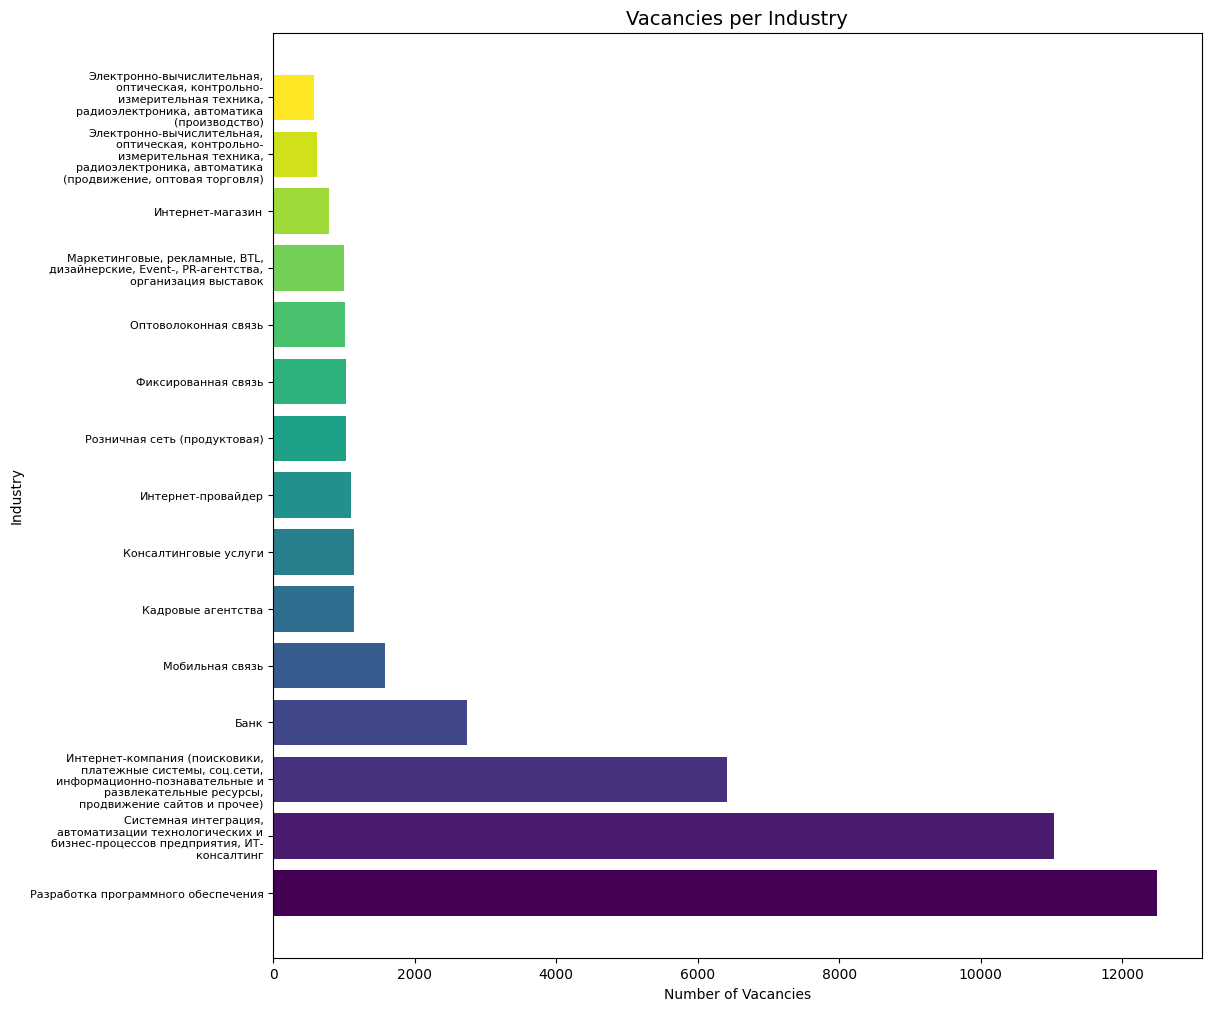

In [18]:
# Optional Enhancements 3
# Горизонтальная столбчатая диаграмма (Seaborn)

import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap


# Подготовка данных
data = df['vacancies_per_industry']
wrapped_labels = ['\n'.join(wrap(label, 35)) for label in data['industry']]
vacancy_counts = data['vacancy_count']

# Генерация цветового градиента
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

# Создание фигуры и построение диаграммы
fig, ax = plt.subplots(figsize=(12, 10), constrained_layout=True)
ax.barh(wrapped_labels, vacancy_counts, color=colors)

# Настройка размера шрифта меток по оси Y (названия отраслей)
ax.tick_params(axis='y', labelsize=8)  # Попробуйте 10–12 для компактной читаемости

# Добавление подписей и заголовка
ax.set_title("Vacancies per Industry", fontsize=14)
ax.set_xlabel("Number of Vacancies")
ax.set_ylabel("Industry")

# Сохранение диаграммы в формате png для последуещего использования в README.md
plt.savefig("plots/vacancies_per_industry.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Optional Enhancements 4
# Анализ со-встречаемости навыков в вакансиях
# Навыки в базе указаны в поле key_skills через табуляцию (CHR(9))
# Считаем, сколько раз встречаются пары навыков в вакансиях (ко-упоминания)

connection = create_sqlalchemy_connection()

def get_skills_cooccurrence_pairs(connection):
        query = """
            WITH skill_list AS (
            SELECT id AS vacancy_id, TRIM(skill) AS skill
            FROM (
                SELECT id, UNNEST(string_to_array(key_skills, CHR(9))) AS skill
                FROM vacancies
            ) AS raw
            )
            SELECT a.skill AS skill_a, b.skill AS skill_b, COUNT(*) AS cooccurrence_count
            FROM skill_list a
            JOIN skill_list b ON a.vacancy_id = b.vacancy_id AND a.skill < b.skill
            GROUP BY a.skill, b.skill
            ORDER BY cooccurrence_count DESC
            LIMIT 10000;
            """

    # Выполняем запрос и возвращаем результат в виде DataFrame
        return pd.read_sql_query(query, connection)




# Загружаем результаты в словарь df под ключом 'skills_cooccurrence' и показываем первые строки
df['skills_cooccurrence_pairs'] = get_skills_cooccurrence_pairs(connection)
df['skills_cooccurrence_pairs'].head()

,skill_a,skill_b,cooccurrence_count
0,Python,SQL,1733
1,Git,JavaScript,1581
2,1С: Предприятие 8,1С программирование,1392
3,CSS,HTML,1317
4,CSS,JavaScript,1249


In [ ]:
# Optional Enhancements 5 — Построение графа навыков
# и кластеризация с помощью алгоритма Лувена (Louvain)

import networkx as nx
import community as community_louvain  # pip install python-louvain

# Step 1: Build the full co-occurrence graph
G = nx.Graph()
for _, row in df['skills_cooccurrence_pairs'].iterrows():
    G.add_edge(row['skill_a'], row['skill_b'], weight=row['cooccurrence_count'])

# Step 2: Filter weak edges (optional)
G_filtered = nx.Graph()
for u, v, data in G.edges(data=True):
    if data['weight'] >= 2:  # threshold can be tuned
        G_filtered.add_edge(u, v, weight=data['weight'])

# Step 3: Apply Louvain clustering
node_cluster_map = community_louvain.best_partition(G_filtered)

# Step 4: Count and sort clusters (optional)
from collections import Counter
cluster_sizes = Counter(node_cluster_map.values())
components_sorted = sorted(cluster_sizes.items(), key=lambda x: x[1], reverse=True)

print(f"Detected {len(cluster_sizes)} clusters")




Detected 9 clusters


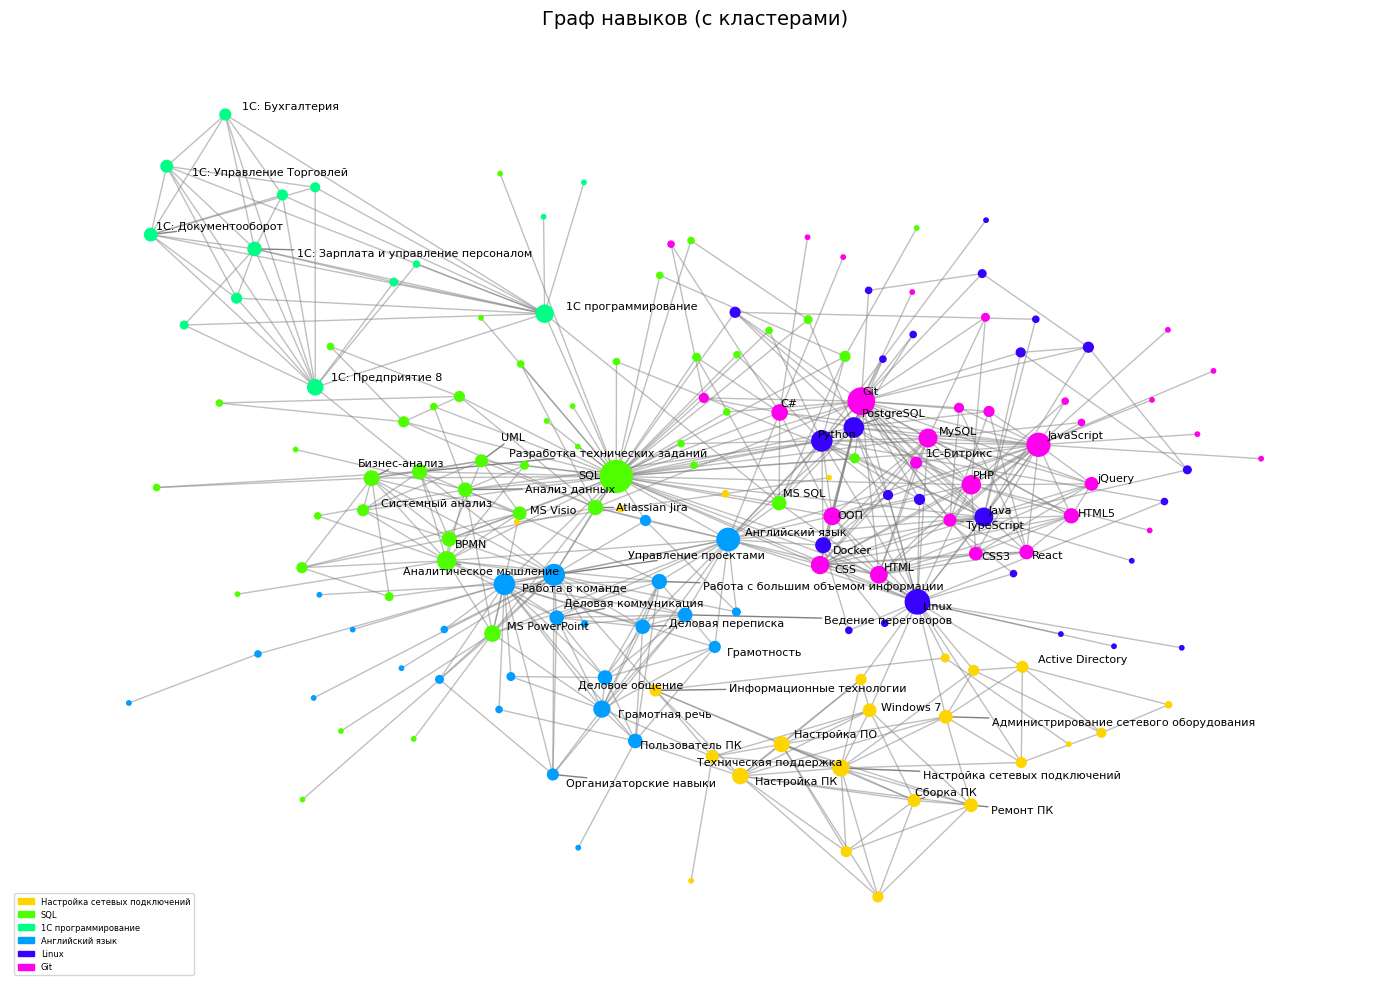

In [ ]:
# Optional Enhancements 6 — визуализация графа навыков с кластерами

import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.patches as mpatches
import seaborn as sns
from collections import defaultdict

# Generate distinct colors for clusters using seaborn
def get_color_palette(n):
    palette = sns.color_palette("hsv", n)
    return [palette[i % n] for i in range(n)]

# Build full graph from filtered edges
G = nx.Graph()
for u, v, data in G_filtered.edges(data=True):
    G.add_edge(u, v, weight=data['weight'])

# Filter nodes by degree
G_sub = G.subgraph([n for n in G.nodes() if G.degree(n) > 2]).copy()

# Filter top-N edges for layout clarity
top_n = 500
top_edges = sorted(G_sub.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_n]
G_sub = nx.Graph()
G_sub.add_edges_from([(u, v, {'weight': d['weight']}) for u, v, d in top_edges])

# Assign cluster colors only for visible clusters
visible_cluster_ids = set(node_cluster_map[n] for n in G_sub.nodes())
cluster_colors = get_color_palette(len(visible_cluster_ids))
cluster_id_to_color = {cid: cluster_colors[i] for i, cid in enumerate(sorted(visible_cluster_ids))}

# Assign node colors
node_colors_sub = [cluster_id_to_color[node_cluster_map.get(n, 0)] for n in G_sub.nodes()]

# Auto-tune layout parameters
n_nodes = len(G_sub.nodes())
k = 1.5 / (n_nodes ** 0.5)
iterations = max(50, n_nodes // 5)
scale = 2 if n_nodes > 100 else 1

# Generate layout
pos = nx.kamada_kawai_layout(G_sub)

# Assign meaningful cluster labels using highest-degree node
cluster_labels = {}
for cid in visible_cluster_ids:
    nodes = [n for n in G_sub.nodes() if node_cluster_map[n] == cid]
    if nodes:
        top_node = max(nodes, key=lambda n: G_sub.degree(n))
        cluster_labels[cid] = top_node
    else:
        cluster_labels[cid] = f"Cluster {cid}"  # fallback

# Draw graph
plt.figure(figsize=(14, 10))
node_sizes = [G_sub.degree(n) * 10 for n in G_sub.nodes()]
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors_sub, node_size=node_sizes)
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', alpha=0.5)

# Label high-degree nodes only
high_degree_nodes = [n for n in G_sub.nodes() if G_sub.degree(n) > 5]
texts = [plt.text(*pos[n], n, fontsize=8) for n in high_degree_nodes]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Add legend with meaningful labels
legend_handles = [
    mpatches.Patch(color=cluster_id_to_color[cid], label=cluster_labels.get(cid, f"Cluster {cid}"))
    for cid in sorted(visible_cluster_ids)
]
plt.legend(handles=legend_handles, loc='lower left', fontsize=6)

# Final touches
plt.title("Граф навыков (с кластерами)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("plots/skill_graph_clusters.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# 📋 Generate Markdown summary table of clusters

from collections import defaultdict

# Group nodes by cluster
cluster_nodes = defaultdict(list)
for node in G_sub.nodes():
    cid = node_cluster_map.get(node)
    cluster_nodes[cid].append(node)

# Build Markdown rows
markdown_rows = []
for cid in sorted(cluster_nodes.keys()):
    nodes = cluster_nodes[cid]
    top_skills = sorted(nodes, key=lambda n: G_sub.degree(n), reverse=True)[:5]
    label = cluster_labels.get(cid, f"Cluster {cid}")
    markdown_rows.append(f"| {cid} | {label} | {len(nodes)} | {', '.join(top_skills)} |")

# Print full Markdown table
print("### 📊 Сводка по кластерам\n")
print("| ID кластера | Представляющий навык | Размер | Топ навыки |")
print("|-------------|----------------------|--------|------------|")
for row in markdown_rows:
    print(row)


### 📊 Сводка по кластерам

| ID кластера | Представляющий навык | Размер | Топ навыки |
|-------------|----------------------|--------|------------|
| 0 | Настройка сетевых подключений | 24 | Настройка сетевых подключений, Настройка ПК, Настройка ПО, Ремонт ПК, Администрирование сетевого оборудования |
| 1 | SQL | 46 | SQL, Аналитическое мышление, MS PowerPoint, Бизнес-анализ, BPMN |
| 2 | 1С программирование | 14 | 1С программирование, 1С: Предприятие 8, 1С: Зарплата и управление персоналом, 1С: Документооборот, 1С: Управление Торговлей |
| 3 | Английский язык | 26 | Английский язык, Управление проектами, Работа в команде, Грамотная речь, Работа с большим объемом информации |
| 5 | Linux | 25 | Linux, Python, PostgreSQL, Java, Docker |
| 7 | Git | 30 | Git, JavaScript, PHP, MySQL, CSS |


### 📊 Сводка по кластерам/ alligned

| ID кластера | Представляющий навык          | Размер | Топ навыки                                                                                                                  |
|-------------|-------------------------------|--------|-----------------------------------------------------------------------------------------------------------------------------|
| 0           | Настройка сетевых подключений | 24     | Настройка сетевых подключений, Настройка ПК, Настройка ПО, Ремонт ПК, Администрирование сетевого оборудования               |
| 1           | SQL                           | 46     | SQL, Аналитическое мышление, MS PowerPoint, Бизнес-анализ, BPMN                                                             |
| 2           | 1С программирование           | 14     | 1С программирование, 1С: Предприятие 8, 1С: Зарплата и управление персоналом, 1С: Документооборот, 1С: Управление Торговлей |
| 3           | Английский язык               | 26     | Английский язык, Управление проектами, Работа в команде, Грамотная речь, Работа с большим объемом информации                |
| 5           | Linux                         | 25     | Linux, Python, PostgreSQL, Java, Docker                                                                                     |
| 7           | Git                           | 30     | Git, JavaScript, PHP, MySQL, CSS                                                                                            |


### 🗂 Cluster Legend

| Cluster ID | Representative Skill          | Color          |
|------------|-------------------------------|----------------|
| 1          | Настройка сетевых подключений | 🟨 Lime       |
| 2          | SQL                           | 🟩 Green      |
| 8          | 1C программирование           | 🟩 Light Green|
| 5          | Английский язык               | 🟣 Light Blue |
| 7          | Linux                         | 🟦 Blue       |
| 6          | Git                           | 🟥 Magenta    |


### Финал

In [36]:
# Закрываем соединение с базой по завершении работы — хорошая практика.
connection.close()